# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Данные за 2016 год могут быть неполными.**

## Шаг 1. Изучение и подготовка данных

Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display_html
import seaborn as sns
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)

import warnings
warnings.filterwarnings("ignore")

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Проверка данных по каждому столбцу.

In [6]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())

In [7]:
check_columns(games)

Уникальные значения столбца Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Уникальные значения столбца Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные значения столбца NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 

In [8]:
#Для начала переименуем столбцы
games.columns = games.columns.str.lower()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

In [9]:
games[games['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.00,Adventure,0.66,0.00,0.00,0.06,NaN,0,E


In [10]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
games['name'].value_counts()

Need for Speed: Most Wanted                 12
LEGO Marvel Super Heroes                     9
Ratatouille                                  9
FIFA 14                                      9
Madden NFL 07                                9
                                            ..
WarTech: Senko no Ronde                      1
Princess Saver! Eternal Love for My Lady     1
Lunar Knights                                1
Kana: Imouto                                 1
Triple Crown Championship Snowboarding       1
Name: name, Length: 11559, dtype: int64

In [17]:
games[games['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.00,Racing,2.03,1.79,0.08,0.47,82.00,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.00,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.00,Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.00,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.00,Racing,0.53,0.46,0.00,0.05,83.00,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.00,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.00,Racing,0.43,0.11,0.00,0.02,80.00,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.00,Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.00,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.00,Racing,0.24,0.01,0.00,0.02,45.00,6.1,E


In [18]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод по шагу 1

Типы переменных:
1. Категориальный: Name, Platform, Genre, Rating.
2. Количественный: Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score.

Столбец User_Score отнесен к количественной переменной. "to be defined" - это отсутсвие оценки на момент выгрузки дата фрейма.

Данные имеют несколько аномалий:
- Пропуски по столцам Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
- Аномалия tbd. Расшифровывается с ангилийского "to be defined". Это нормальное явление для компьютерных игр. Компьютерная игра должна пройте через определенное количество игроков или экспертов-геймеров, чтобы они дали оценку игре.
- Тип столбца Year_of_Release. Год - целое число.
- Дубликаты по имени, платформе и году выпуска. Возможно эту игру вносили несколько раз, давая информацию о разных рынках продажи.

Данные требуют предобработки.

Случайный тип аномалии:
- Пропуски в столбцах Name и Genre. Это строки 659 и 14244. По году и платформе видно. Что это одна и также игра, только в одной строке храниться данные о продажах в Европе и Америке, а во второй - только по Японии.
- Пропуск в столбце Year_of_Release. Аггрегатор игр мог и не получить информацию от создателей или издателей игр.

Неслучайный тип аномалии

- Пропуски в столбцах Critic_Score, User_Score и Rating. Оценка игр походит не быстро, а может даже вообще не пройти, так что по всему миру крупные агенства по рейтингу игр могут не оставить оценку. Из-за этого в большинстве случаев отсутсвуют оценки игроков или ESRB оценка.

## Шаг 2. Подготовка данных

### Обработка пропусков

Определение значимых и восстанавливаемых пропусков данных:

**Возможно восстановить**
- year_of_release. В названиях могут присутствовать год. Для спортивных игр надо учитывать, что написаный год может означать год конца сезона. Пример FIFA 2004 это про сезон 2003/2004 года по футболу. Значит игру выпускают перед началом сезона, тоесть в 2003.
- rating. ESRB часто повторяет один и тот де тип оценки для одинаковых жанров. Восстановим их используя популярный ESRB рейтинг в жанре.

**Невозможно восстановить**
- critic_score и user_score. В этих столбцах нельзя выявить средние или медианные закономерности по году или жанру. Каждая игра получается индивидуальной и оценка критиков, и пользователей - субъективное мнение об игре конкретного года, жанра, платформы, студии разработчика, издателя, рекламы и репутации о серии игр. Слишком много факторов необходимо учесть для восстановления данных.


В столбце name имеются пропуски. Эти строчки придется удалить.

In [19]:
 games[games['name'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
 games = games.dropna(subset=['name']).reset_index(drop=True)

 Пропуски в остальных столбцах мы заменять не будем, чтобы не искажать данные. Строки с пропущенным годом релиза удалим, их меньше 300 штук (около 1.6% от всего объема данных)

In [21]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True) 

 В столбце user_score кроме числовых значений и NaN есть и другие значения:

In [22]:
games[games['user_score'].notna()]['user_score'].sort_values(ascending=False).unique() 

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0'], dtype=object)

 Аббревиатура "tbd" означает "to be defined" - предстоит определить, то есть на данный момент это пропуск в данных. Заменим на их на NaN.

In [23]:
 games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

 Пропуски в рейтинге ESRB заменим на аббревиатуру ND - не определен. Устаревшую аббревиатуру "K-A" заменим на современное обозначение "E".

In [24]:
games['rating'] = games['rating'].fillna(value='ND')
games['rating'] = games['rating'].replace('K-A', 'E')

 Пропуски в столбцах рейтингов критиков и пользователей оставим без изменений. Они связаны, вероятно, с тем, что не каждая игра удостаивалась внимания критиков или доходила до широких международных рынков, а также с региональными особенностями.

In [25]:
games['rating'].value_counts()

ND      6676
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

### Приведение типов данных

Год выпуска сохранен с плавающей точкой, хотя никаких дробных частей в годах нет. Приведем их к целочисленному типу. 

Ранее замененные на NaN тектовые значения в столбце user_score приведем к дробным числам.

In [26]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели типы данных.</font>

### Удаление дупликатов

In [27]:
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [28]:
games.drop_duplicates()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Добавление столбца "Продажи по миру"

Создадим столбец с суммарными продажами во всех регионах

In [29]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 

### Типы платформ и компании-производители
Для дальнейшего анализа добавим столбец с типом платформы - стационарная консоль, портативная или ПК, и столбец с наименованием компании-производителя консоли. 

In [30]:
def platform_type(platform):
    mobile = ['GB', 'DS', 'GBA', '3DS', 'PSP', 'PSV', 'GG']
    stationary = ['Wii', 'NES', 'X360', 'PS3', 'PS2', 'SNES', 'PS4', 'N64', 'PS', 'XB', '2600', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16','3DO', 'PCFX']
    if platform in mobile:
        platform_type = 'mobile'
    if platform in stationary:
        platform_type = 'stationary' 
    if platform == 'PC':
        platform_type = 'PC'
    return platform_type
games['platform_type'] = games['platform'].apply(platform_type)

In [31]:
def company_name(platform):
    companies = {'Atary' : ['2600'], 
                'Bandai' : ['WS'],
                'Microsoft' : ['X360', 'XOne', 'XB'],
                'NEC' : ['TG16', 'PCFX'],
                'Nintendo' : ['N64', '3DS', 'Wii', 'WiiU', 'NES', 'SNES', 'GB', 'GC', 'DS', 'GBA'],
                'Sega' : ['GG', 'GEN', 'SAT', 'DC', 'SCD'],
                'Sony' : ['PS', 'PS2', 'PS3', 'PS4', 'PSV', 'PSP'],
                'Panasonic' : ['3DO'],
                'SNK' : ['NG'],
                'PC' : ['PC']
                }
    for key, value in companies.items():
        if platform in value:
            return key
games['company'] = games['platform'].apply(company_name)

In [32]:
 games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
 12  platform_type    16444 non-null  object 
 13  company          16444 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


### Вывод по шагу 2

Мы привели имена столбцов к snake_case, привели данные в двух столбцах к целочисленному типу и избавились от записей с критичными пропусками в данных - названием и годом выпуска, а также добавили новые столбцы - подсчитали суммарный объем продаж во всех регионах. Всего из 16715 строк осталось 16444.

In [33]:
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
    print('-'* 25)
    print(col_l, temp[col_l].sort_values().unique())
    print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
 12  platform_type    16444 non-null  object 
 13  company          16444 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's 

## Шаг 3. Исследовательский анализ данных

###  Выпуск игр в разные годы

Посмотрим, какое количество релизов и продаж было в разные годы, и построим график.

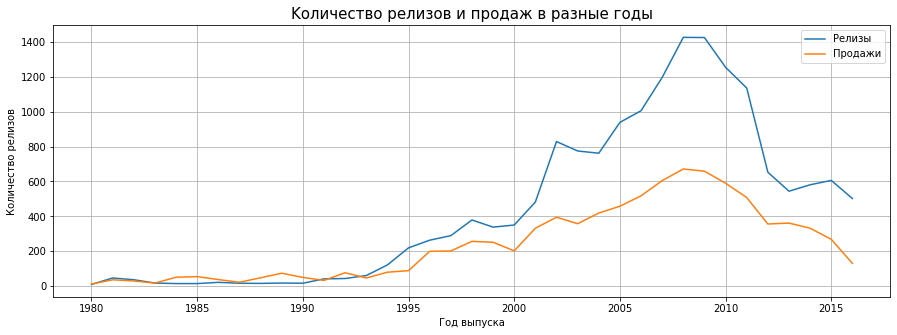

In [34]:
plt.figure(figsize=(15,5))
plt.plot(games.groupby('year_of_release')['name'].count(), label='Релизы')
plt.plot(games.groupby('year_of_release')['total_sales'].sum(), label='Продажи')
plt.title('Kоличество релизов и продаж в разные годы', fontsize=15)
plt.grid(True)
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.show()

In [35]:
games.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(10)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: name, dtype: int64

In [36]:
games.groupby('year_of_release')['name'].count().sort_values(ascending=False).tail(15)

year_of_release
1994    121
1993     60
1981     46
1992     43
1991     41
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1988     15
1985     14
1984     14
1980      9
Name: name, dtype: int64

В 2000-х годах наступает настоящий расцвет видеоигр, и количество релизов достигает максимума - более чем 1400 в 2008-2009 годах. 

До 1994 года количество релизов в год не превышало 100, и эти данные сложно назвать актуальными. Взлет начинается в 1994 году, возможно, с удешевлением гаджетов и их повсеместным распространением. 

Посмотреть, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [37]:
platform_type_releases = games.pivot_table(index='year_of_release', values = 'name', columns='platform', aggfunc='count')

platform_type_releases.count()

platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
dtype: int64

In [38]:
platform_type_releases = games.pivot_table(index='platform_type', values = 'name', columns='year_of_release', aggfunc='count').T

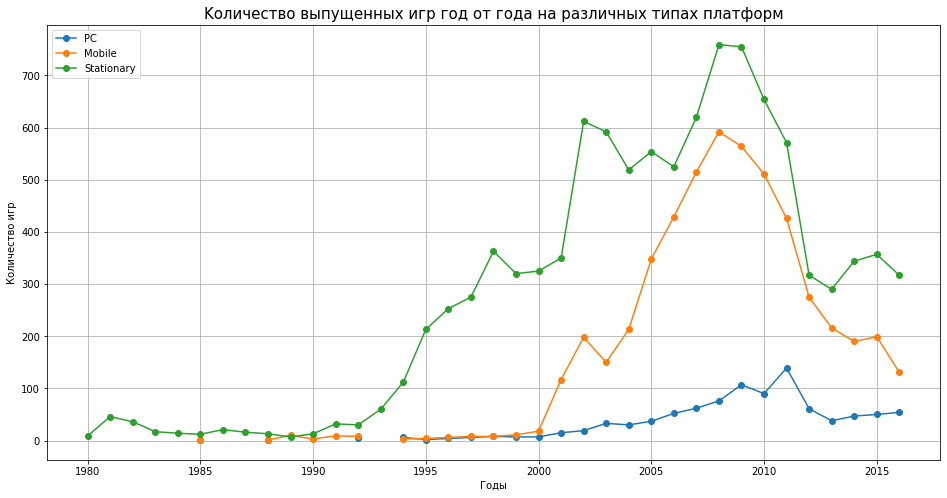

In [39]:
plt.figure(figsize=(16, 8))
plt.plot(platform_type_releases['PC'], marker ='o', label='PC')
plt.plot(platform_type_releases['mobile'], marker ='o', label='Mobile')
plt.plot(platform_type_releases['stationary'], marker ='o', label='Stationary')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.title('Kоличество выпущенных игр год от года на различных типах платформ', fontsize=15)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

 Так как до 1994 года количество релизов совсем небольшое (менее 100 в год), а прошло более 20 лет - эти данные можно счесть устаревшими и не рассматривать далее.

In [40]:
games_94 = games[games['year_of_release'] > 1993]

Создадим сводную таблиц по платформам и продажам по регионам

In [41]:
top_saler_platform = games.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc=('sum'))

Сделаем в таблице еще столбец, в котором сумма по всем регионам.

In [42]:
top_saler_platform['all_sales']=top_saler_platform['na_sales']+top_saler_platform['eu_sales']+top_saler_platform['jp_sales']+top_saler_platform['other_sales']

<AxesSubplot:title={'center':'Выручка каждой платформы в разных регионах и общая'}, xlabel='platform'>

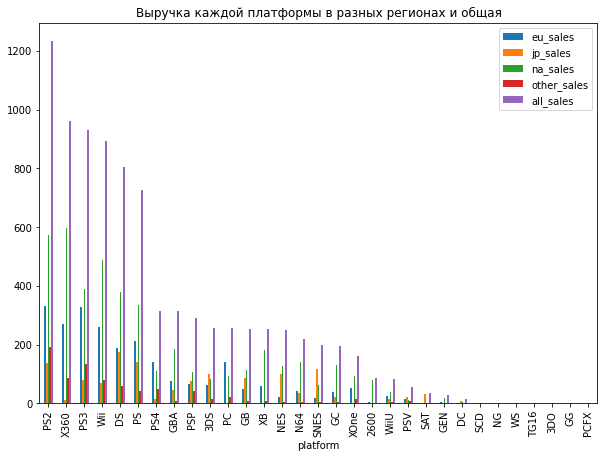

In [43]:
top_saler_platform.sort_values(by='all_sales',ascending=False).plot(kind='bar',figsize=(10,7),title='Выручка каждой платформы в разных регионах и общая')

Из графика явно видно, что топ выручки у платформ PS2,X360,PS3,Wii,DS,PS.

Сводная таблица платформ по годам. 

In [44]:
games_plat=games.pivot_table(index="platform",columns='year_of_release',values='total_sales',aggfunc=('sum'))

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

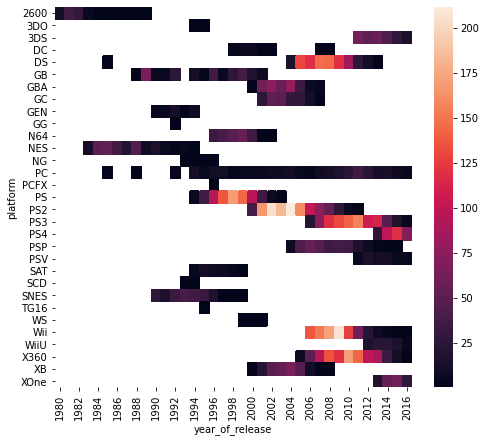

In [45]:
plt.figure(figsize=(8,7))
sns.heatmap(games_plat)

Приведена тепловая карта всех приставок с 1985 по 2016. По тепловой карте можно увидеть платформы у которых один производитель, и как платформы приходят на замену старым. Например можно увидеть "лестницу" производителя Nintendo со своими платформами: GBA(не уверен),DS,3DS. Производителя Sony с платформами: ps,ps2,ps3,ps4. это явные производители из нескольких платформ.

Список top платформ

In [46]:
list_platform=['PS2','X360','PS3','Wii','DS','PS']

Cрез по top платформам

In [47]:
top_platform=games_plat.query('platform in @list_platform')

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

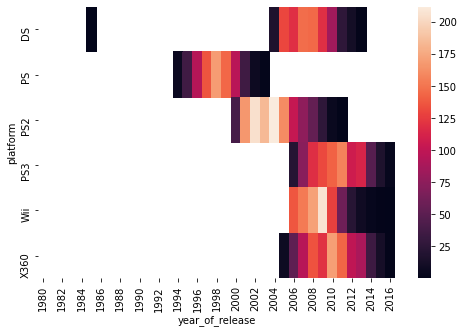

In [48]:
plt.figure(figsize=(8,5))
sns.heatmap(top_platform)

По тепловой карте видно, что платформа в среднем живет 10-12 лет. Пик продаж приходит в среднем через 5-6 лет, т.е. в самой середине срока жизни. Компания PS начинает релиз новой платформы примерно через это время, когда начинается спад у предыдущей. Интересный год 2004. На рынок вернулась платформа DS. В 2006 появились новые платформы, которые завоевали популярность. Как раз в тот момент, когда продажи PS2 стали падать и когда запустили новую PS3. Платформа Wii с первого года имела высокие продажи. Но постепенно ее продажи стали падать и падают до сих пор.

Срез по году. Принимаю, что для анализа игр на 2017 год принимаю актуальные года с 2012 года.

In [49]:
actual_data=games.query('year_of_release>=2012')

<AxesSubplot:title={'center':'Суммарные продажи по платформам с 2012 года'}, xlabel='platform'>

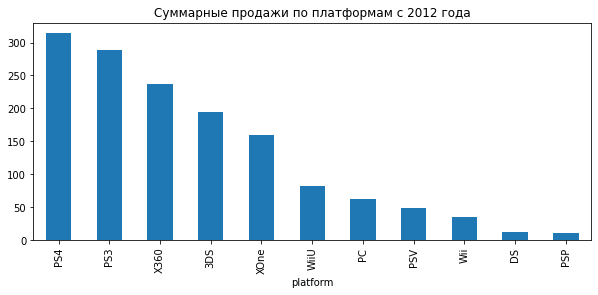

In [50]:
actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(10,4),kind="bar",title='Суммарные продажи по платформам с 2012 года')

Список активных платформ 

In [51]:
list_platform=['3DS','PS3','PS4','X360','XOne']

Срез по активным платформам

In [52]:
top_platform=games_plat.query('platform in @list_platform') 

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

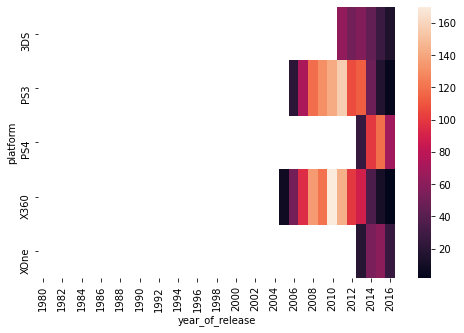

In [53]:
plt.figure(figsize=(8,5))
sns.heatmap(top_platform)

Выше прадставлен график активных платформ за актуальный период. По нему видно, что Актуальной платформой можно назвать PS4. Продажи ее только-только начинают падать. Это значит, что примено через год будет выходить новая платформа.

Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Описать результат

Дата сет с активными платформами и актуальным периодом

In [54]:
actual_data=games.query('year_of_release>=2012')

In [55]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_type,company
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05,stationary,Sony
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27,stationary,Microsoft
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63,stationary,Sony
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60,mobile,Nintendo
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79,stationary,Sony


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

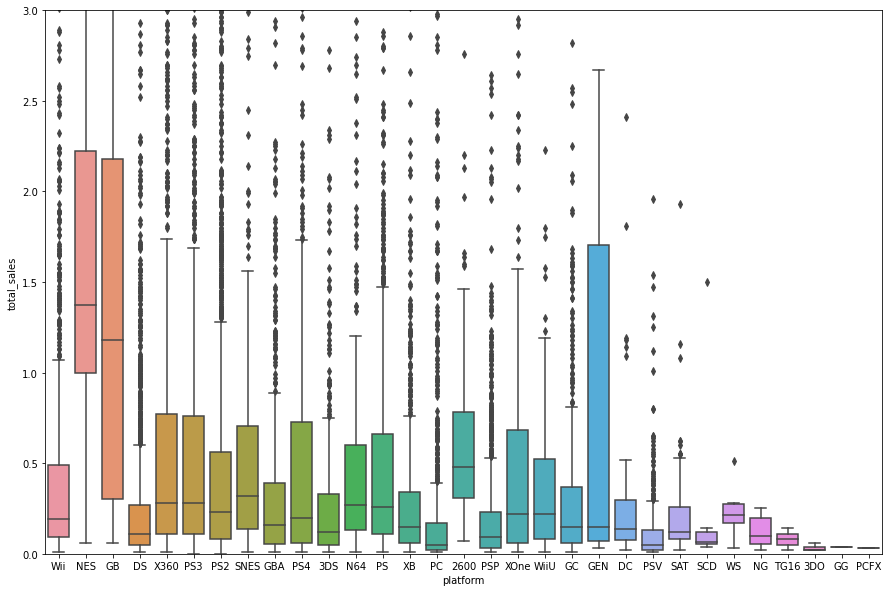

In [56]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x=games['platform'],y=games['total_sales'])

Межквартальный размах очень похож у платфором X360, PS3, PS4, PS, XOne. У них примерно одинаковая медиана около 0.28 млн. 3 квартиль заканчивается примерно 0.7 млн. Все распрадаления платформ скошены вправо. Можно сказать, что у всех ящиков медина лежит левее среднего значения. У компаний, у которых пользовательский интерес ниже имеют медину (второй квартиль) около 0.1-0.2.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

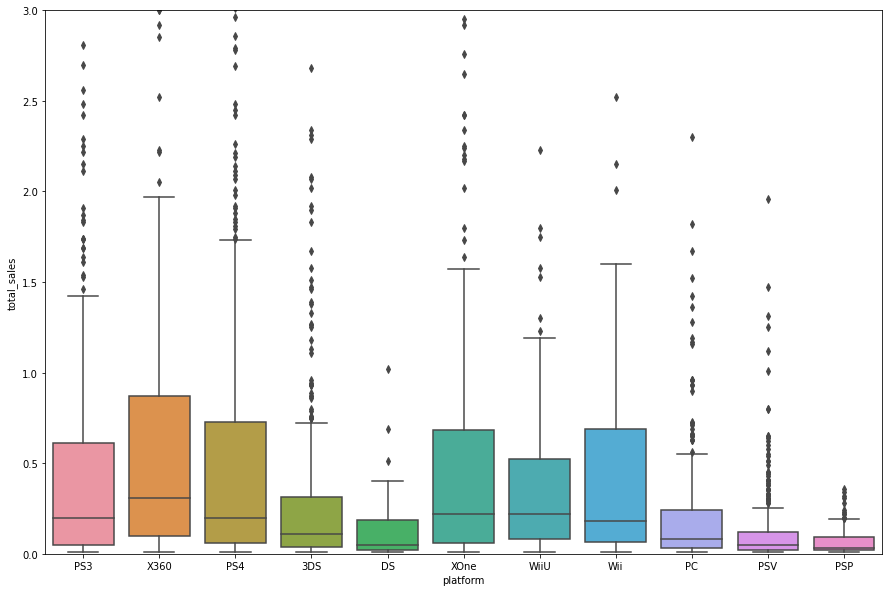

In [57]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)

sns.boxplot(x=actual_data['platform'],y=actual_data['total_sales'], )

Анализируя ящик с усами можно увидеть, что они похожи. за исключением платформы 3DS. У нее третий квартиль меньшем у остальных. Можно сказать, что медиана продаж у этих платформ почти одинакова. Они все скошены вправо.

Средние значания глобальных продаж каждой игры и разбивкой по платформам

In [58]:
mean_sales=actual_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)


Медианные значания глобальных продаж каждой игры и разбивкой по платформам

In [59]:
median_sales=actual_data.groupby('platform')['total_sales'].median().sort_values(ascending=False)


<AxesSubplot:title={'center':'Соотношение среднего и медианного значения продаж по каждой приставке'}, xlabel='platform'>

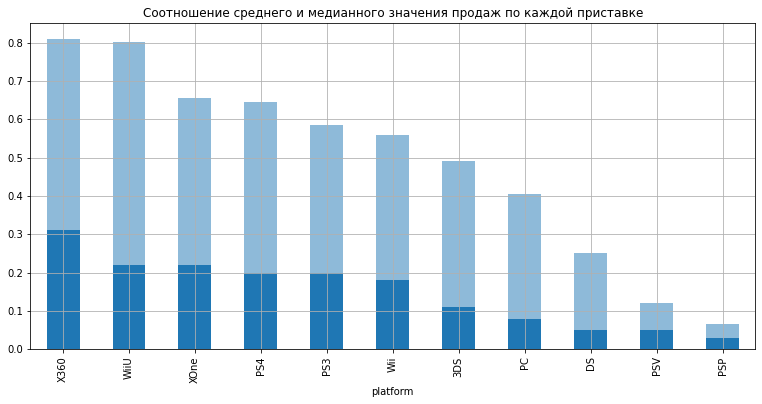

In [60]:
ax=mean_sales.plot(y='platform',figsize=(13,6),kind='bar',label='mean',alpha=0.5)
median_sales.plot(y='platform',grid=True,figsize=(13,6),kind='bar',label='median',ax=ax,title="Соотношение среднего и медианного значения продаж по каждой приставке")


Медианные значения сильно отличаются от средних. Везде медиана ниже среднего. Как и было сказано ниже, медиана лежит левее среднего. По гисторгамме видно, что на мадиана меньше среднего в несколько раз.

### Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Выделим топ платформ

In [61]:
most_popular = games.groupby('platform').sum()['total_sales'].sort_values(ascending=False).index.values[:10]
popular_platform  = actual_data[actual_data.platform.isin(most_popular)]
popular_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_type,company
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05,stationary,Sony
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27,stationary,Microsoft
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63,stationary,Sony
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60,mobile,Nintendo
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79,stationary,Sony


In [62]:
popular_grouped = popular_platform.groupby('platform').sum()
popular_grouped

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
3DS,797445,55.31,42.64,87.79,8.87,7261.00,801.80,194.61
DS,62380,4.59,3.53,3.72,0.71,80.00,21.00,12.55
PS3,992629,103.38,106.86,35.29,43.26,15315.00,1848.80,288.79
PS4,789937,108.74,141.09,15.96,48.35,18167.00,1734.30,314.14
PSP,348159,0.13,0.42,10.47,0.17,74.00,23.80,11.19
Wii,108688,17.45,11.92,3.39,2.61,381.00,103.40,35.37
X360,587862,140.05,74.52,1.57,20.40,12119.00,1461.90,236.54


In [63]:
popular_platforms_list = popular_grouped.index.values
popular_platforms_list

array(['3DS', 'DS', 'PS3', 'PS4', 'PSP', 'Wii', 'X360'], dtype=object)

Выделим топ-5

In [64]:
top_5 = ['PS4', 'PS3', 'X360', '3DS', 'Wii']

Построим диаграммы рассеяния зависимости продаж платформ от отзывов пользователей

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  PS4 от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

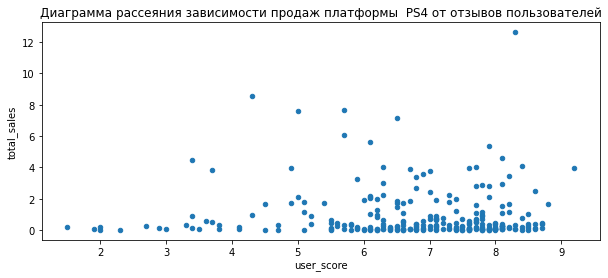

In [65]:
actual_data.query('platform=="PS4"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS4 от отзывов пользователей')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

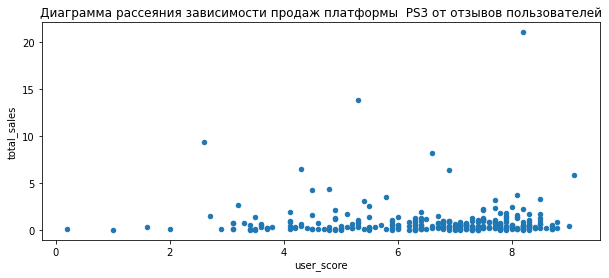

In [66]:
actual_data.query('platform=="PS3"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов пользователей')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  X360 от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

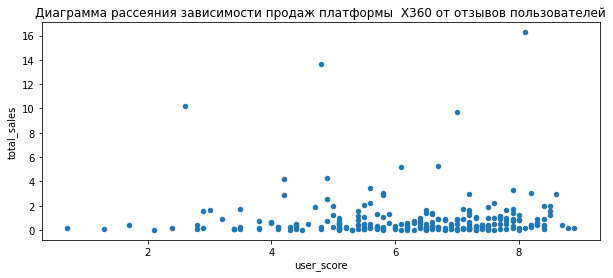

In [67]:
actual_data.query('platform=="X360"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  X360 от отзывов пользователей')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  3DS от отзывов пользователей'}, xlabel='user_score', ylabel='total_sales'>

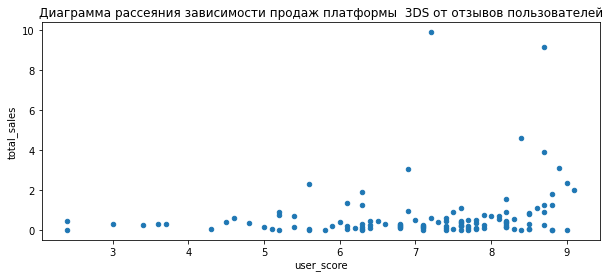

In [68]:
actual_data.query('platform=="3DS"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  3DS от отзывов пользователей')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  Wii от отзывов критиков'}, xlabel='user_score', ylabel='total_sales'>

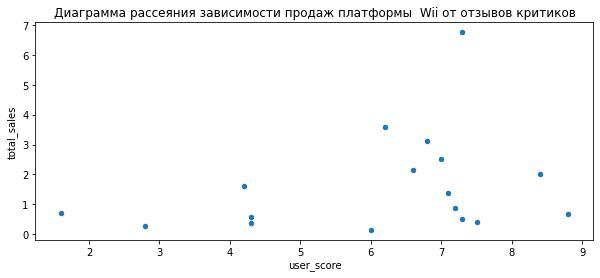

In [69]:
actual_data.query('platform=="Wii"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  Wii от отзывов критиков')

Построим диаграммы рассеяния зависимости продаж платформ от отзывов критиков

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  PS4 от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

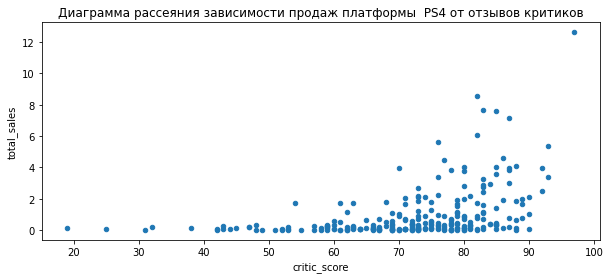

In [70]:
actual_data.query('platform=="PS4"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS4 от отзывов критиков')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

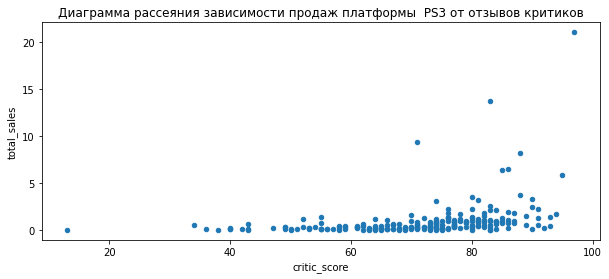

In [71]:
actual_data.query('platform=="PS3"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов критиков')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  X360 от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

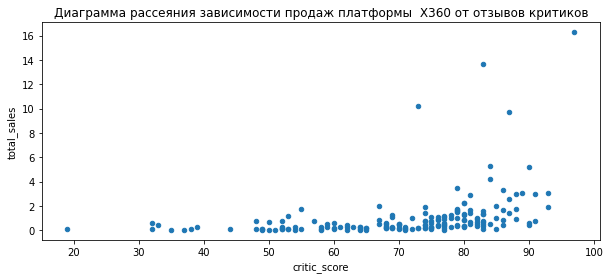

In [72]:
actual_data.query('platform=="X360"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  X360 от отзывов критиков')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  3DS от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

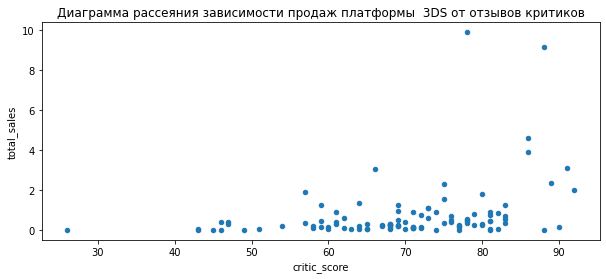

In [73]:
actual_data.query('platform=="3DS"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  3DS от отзывов критиков')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  Wii от отзывов критиков'}, xlabel='critic_score', ylabel='total_sales'>

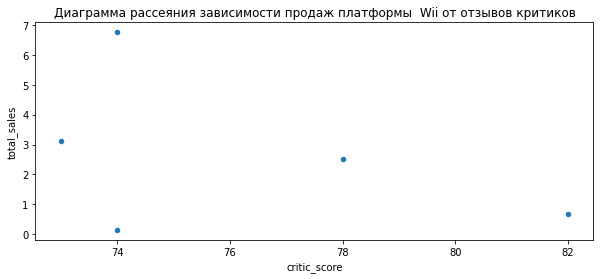

In [74]:
actual_data.query('platform=="Wii"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  Wii от отзывов критиков')

Для большинства платформ  заметна положительная корреляция между critic_score/user_score и суммарным количеством продаж


Высокий рейтинг далеко не всегда означает большие продажи, но вот низкий рейтинг почти всегда сулит низкий уровень продаж

In [75]:
print('Кореляции меду critic_score и world_sales\n')
for platform in top_5:
    print(f'Платформа: {platform}, Уровень кореляции:',popular_platform[popular_platform['platform']==platform].corr().loc['critic_score', 'total_sales'])

Кореляции меду critic_score и world_sales

Платформа: PS4, Уровень кореляции: 0.40656790206178123
Платформа: PS3, Уровень кореляции: 0.3314972592629597
Платформа: X360, Уровень кореляции: 0.3605734888507335
Платформа: 3DS, Уровень кореляции: 0.32080286953607867
Платформа: Wii, Уровень кореляции: -0.42434130110774937


In [76]:
print('Кореляции меду user_score и world_sales\n')
for platform in top_5:
    print(f'Платформа: {platform}, Уровень кореляции:',popular_platform[popular_platform['platform']==platform].corr().loc['user_score', 'total_sales'])

Кореляции меду user_score и world_sales

Платформа: PS4, Уровень кореляции: -0.03195711020455685
Платформа: PS3, Уровень кореляции: -0.00514352288711377
Платформа: X360, Уровень кореляции: 0.006163978646212845
Платформа: 3DS, Уровень кореляции: 0.19758263411038585
Платформа: Wii, Уровень кореляции: 0.29619680007479526


Низкие уровни кореляции могут быть обусловлены тем, что кореляции отображает силу линейной взаимосвязи, а у этих данных может быть другая зависимость

**Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [77]:
temp1, temp2 = actual_data.total_sales.sum(), games.query('year_of_release>=2012').total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1446.5300000000002, 1446.5300000000002, 0.0)

In [78]:
median_sale_genre=actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)
count_genre=actual_data.groupby('genre')['total_sales'].count().sort_values(ascending=False)

<AxesSubplot:title={'center':'Распределение по жанрам и количеством продаж'}, xlabel='genre'>

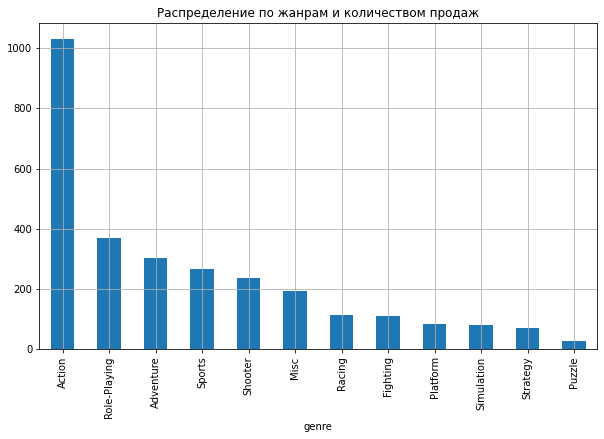

In [79]:
count_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Распределение по жанрам и количеством продаж')

Больше всего пользователи покупают игры в жанре Action, а меньше всего игры в жанре puzzle, strategy. Разница в количестве продаж почти в 6,5 раз. Следом по популярности идет жанр Sport

<AxesSubplot:title={'center':'Распределение по жанрам и глобальных медианных продаж'}, xlabel='genre'>

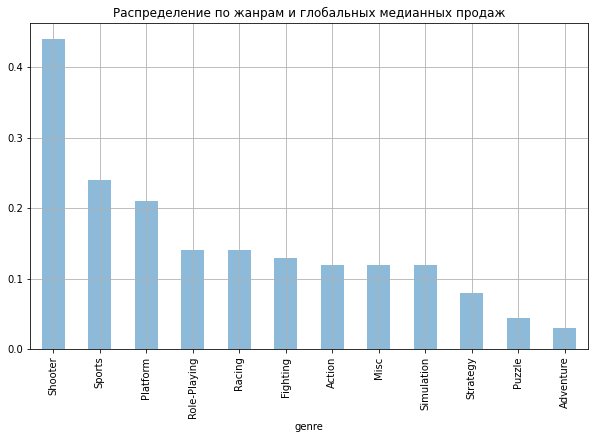

In [80]:
median_sale_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',alpha=0.5,title='Распределение по жанрам и глобальных медианных продаж')

Что касается выручки от продаж, то тут можно сказать, что самым высоким является жанр shooter, platform, sport. Тогда как самый покупаемый жанр Action немного ниже. Меньше всего выручки у жанра Adventure.

## Шаг 4. Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Установим актуальным периодом 2010-2016 годы и сохраним данные за эти годы в отдельной переменной games_actual

In [81]:
games_actual = games.query('year_of_release >= 2012')
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_type,company
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05,stationary,Sony
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27,stationary,Microsoft
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63,stationary,Sony
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60,mobile,Nintendo
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79,stationary,Sony


### Определение топ-5 по популярности платформ для каждого региона

In [82]:
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_type,company
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05,stationary,Sony
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27,stationary,Microsoft
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63,stationary,Sony
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60,mobile,Nintendo
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79,stationary,Sony


In [83]:
na_sales_platform=games_actual.pivot_table(index='platform',values=['na_sales','total_sales'],aggfunc=('sum'))

Топ 5 продаж платформ в Северной Америке

In [84]:
na_sales_platform=na_sales_platform.sort_values(by='na_sales',ascending=False).head(5)
na_sales_platform

,na_sales,total_sales
platform,,
X360,140.05,236.54
PS4,108.74,314.14
PS3,103.38,288.79
XOne,93.12,159.32
3DS,55.31,194.61


Самая популярная платформа в С. Америке- X360, затем PS2 c небольшой разницей. PS3 на четвертом месте.

Посчитаем долю продаж

In [85]:
na_sales_platform['% sales']=na_sales_platform['na_sales']/na_sales_platform['total_sales']

In [86]:
eu_sales_platform=games_actual.pivot_table(index='platform',values=['eu_sales','total_sales'],aggfunc=('sum'))

Топ 5 продаж платформ в Европе

In [87]:
eu_sales_platform=eu_sales_platform.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_platform

,eu_sales,total_sales
platform,,
PS4,141.09,314.14
PS3,106.86,288.79
X360,74.52,236.54
XOne,51.59,159.32
3DS,42.64,194.61


Самая популярная платформа в Европе- PS2, затем PS3. На 3 месте X360. PS на 5 месте.

Посчитаем долю продаж

In [88]:
eu_sales_platform['% sales']=eu_sales_platform['eu_sales']/eu_sales_platform['total_sales']


Топ 5 продаж платформ в Японии

In [89]:
jp_sales_platform=games_actual.pivot_table(index='platform',values=['jp_sales','total_sales'],aggfunc=('sum'))

In [90]:
jp_sales_platform=jp_sales_platform.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_platform

,jp_sales,total_sales
platform,,
3DS,87.79,194.61
PS3,35.29,288.79
PSV,21.04,49.18
PS4,15.96,314.14
WiiU,13.01,82.19


Самая популярная платформа в Японии DS, затем PS3. На 3 месте X360. PS на 5 месте.

Посчитаем долю продаж

In [91]:
jp_sales_platform['% sales']=jp_sales_platform['jp_sales']/jp_sales_platform['total_sales']

Рассматривая все три региона можно выделить, что в топ платформ везде присутствуют PS, PS2, PS3.

Круговая диаграмма доли продаж по na, eu, jp:

<AxesSubplot:ylabel='% sales'>

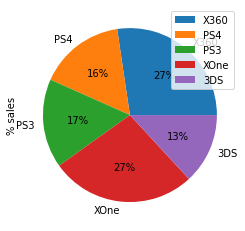

In [92]:
na_sales_platform.plot(kind='pie',y="% sales", autopct='%1.0f%%')

В С. Америке платформа X360 имеет четверть всех продаж этой платформы. PS2 и PS3 доля всех продаж этих платформ около 30%. Также почти четверть всех продаж у платформы Wii

<AxesSubplot:ylabel='% sales'>

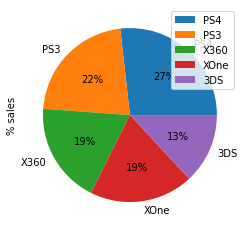

In [93]:
eu_sales_platform.plot(kind='pie',y="% sales", autopct='%1.0f%%')

В Европе четверть продаж имеет платформа PS3 от суммы всех продаж этой платформы. Доли продаж X360, PS, PS2 почти одинаковы и составляют около 30%.

<AxesSubplot:ylabel='% sales'>

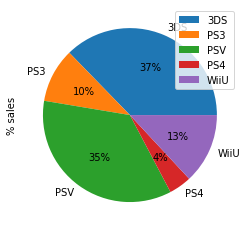

In [94]:
jp_sales_platform.plot(kind='pie',y="% sales", autopct='%1.0f%%')

В Японии платформа 3DS самая популярная и в этом регионе имеет самую большую долю продаж. Полный рекордсмен. PS и DS почти одинаковы около 30%

### Топ-5 жанров:

Топ 5 жанров в Северной Америке

In [95]:
na_sales_genre=games_actual.pivot_table(index='genre',values=['na_sales'],aggfunc=('sum'))

In [96]:
na_sales_genre=na_sales_genre.sort_values(by='na_sales',ascending=False).head(5)
na_sales_genre

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


Самый популярный жанр в С. Америке- это Action. Затем Sport и Shooter

Топ 5 жанров в Европе

In [97]:
eu_sales_genre=games_actual.pivot_table(index='genre',values=['eu_sales'],aggfunc=('sum'))

In [98]:
eu_sales_genre=eu_sales_genre.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_genre

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


В Европе самые популярные жанры такие же как и в С. Америке

Топ 5 жанров в Японии

In [99]:
jp_sales_genre=games_actual.pivot_table(index='genre',values=['jp_sales'],aggfunc=('sum'))

In [100]:
jp_sales_genre=jp_sales_genre.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_genre

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


В Японии ситуация другая. На первом месте Role-Playing и имеет очень большое преимущество по сравнению с остальными. Потом Action и Sport.

Круговая диаграмма жанров по na, eu, jp:

<AxesSubplot:ylabel='jp_sales'>

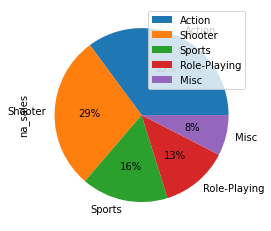

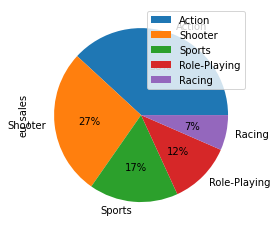

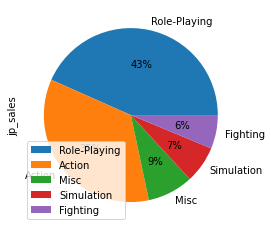

In [101]:
na_sales_genre.plot(kind='pie',y="na_sales", autopct='%1.0f%%')
eu_sales_genre.plot(kind='pie',y="eu_sales", autopct='%1.0f%%')
jp_sales_genre.plot(kind='pie',y="jp_sales", autopct='%1.0f%%')

Во всех регионах самыми популярными являются жанры Action, Sport, Misc. В Японии плюс к ним очень высокой популярностью пользуется жанр Role-Playing.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Соотношение рейтинга ESRB и продаж в Северной Америке

In [102]:
na_sales_ESRB=games_actual.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))

In [103]:
na_sales_ESRB=na_sales_ESRB.sort_values(by='na_sales',ascending=False)
na_sales_ESRB

,na_sales
rating,
M,231.57
E,114.37
ND,103.31
E10+,75.70
T,66.02


Соотношение рейтинга ESRB и продаж в Европе

In [104]:
eu_sales_ESRB=games_actual.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))

In [105]:
eu_sales_ESRB=eu_sales_ESRB.sort_values(by='eu_sales',ascending=False)
eu_sales_ESRB

,eu_sales
rating,
M,193.96
E,113.03
ND,91.50
E10+,55.37
T,52.96


Соотношение рейтинга ESRB и продаж в Японии

In [106]:
jp_sales_ESRB=games_actual.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))

In [107]:
jp_sales_ESRB=jp_sales_ESRB.sort_values(by='jp_sales',ascending=False)
jp_sales_ESRB

,jp_sales
rating,
ND,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


Построим гистограммы рейтингов по разным регионам:

<AxesSubplot:xlabel='rating'>

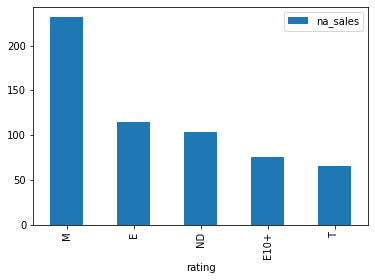

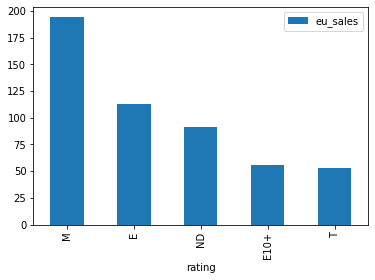

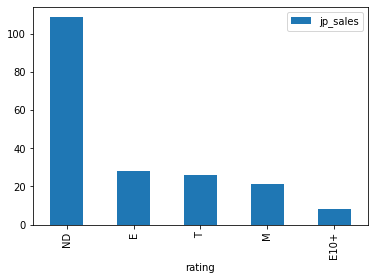

In [108]:
na_sales_ESRB.plot(kind='bar') 
eu_sales_ESRB.plot(kind='bar')
jp_sales_ESRB.plot(kind='bar')

Самые популярные возрастные ограничения в С. Америке, Европе, Японии- E, T, M, E10+. Больше всего E (Для всех), затем T (для подростков 13-19 лет). Категории M (от 17) и Е+10 (10+) в Японии гораздо меньше чем в остальных регионах. Ну по сути это таже самая категория T. Остальных ограничения очень мало. Можно сделать вывод, что возрастное ограничение влияет на продажи. Т.е выпуская новый продукт нужно понимать, что большей популярностью пользуются продукты с возрастным ограничением во всех регионах E (Для всех) или T(для подростков 13-19 лет). По сути категория М и Е10+ это таже самая что и Т. Т.е можно считать, что категория Е и Т почти равны.

Анализируя будующие продажи на 2017 год можно с уверенностью сказать, что хорошие продажи можно получить у платформ '3DS','PS3','PS4','X360','XOne'. Так же обратить внимание на появление новой платформы PS. Что касается жанров, то тут самые продаваемые Action, Sport, Shooter с ориентацией для подростков от 13-19 лет.

## Шаг 5. Проверка гипотез

#### Гипотеза 1
Сформулируем гипотезы:

- Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н1: Нулевая гипотеза: cредний пользовательский рейтинг платформы XOne и PC разные.

Значение критического уровня вероятности (альфа) примем равным 5%.

Пропущенные значечния отфильтруем.

Bыборки пользовательских рейтингов по платформам, очищенные от пропусков:

In [109]:
XOne_data = games_actual.query('platform == "XOne" and user_score.notna()')['user_score']
PC_data = games_actual.query('platform == "PC" and user_score.notna()')['user_score']

<AxesSubplot:xlabel='user_score', ylabel='Density'>

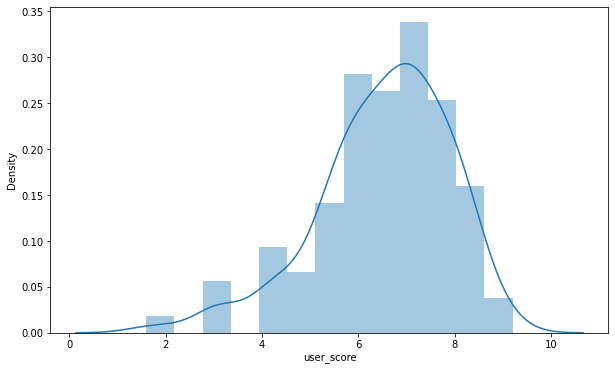

In [110]:
plt.figure(figsize=(10,6))
sns.distplot(XOne_data)

Диаграмма распределения значений пользовательского рейтинга для платформы XOne

In [111]:
alpha = 0.05

a = actual_data.loc[actual_data['platform']=='XOne'].user_score.dropna().values
b = actual_data.loc[actual_data['platform']=='PC'].user_score.dropna().values

if st.ttest_ind(a,b).pvalue>alpha:
    print('Не можем отклонить нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу о равенстве средних')

Не можем отклонить нулевую гипотезу


Нулевую гипотеза отвергнута. Средние значения двух генеральных выборок пользовательских рейтингов платформы XOne и PC не равны

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали пропуски. 👍</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font>

#### Гипотеза 2
Сформулируем гипотезы:

- Н0: cредний пользовательский рейтинг Action и Sports равны.
- Н1: средние пользовательские рейтинги жанров Action и Sport не равны

Значение критического уровня вероятности (альфа) примем равным 5%.

Пропущенные значечния отфильтруем.

Bыборки пользовательских рейтингов по платформам, очищенные от пропусков:

In [112]:
action_data = games_actual.query('genre == "Action" and user_score.notna()')['user_score']
sport_data = games_actual.query('genre == "Sports" and user_score.notna()')['user_score']

In [113]:
st_interval_action=st.t.interval(0.95, len(action_data)-1, loc=np.mean(action_data), scale=st.sem(action_data))
print('Доверительный 95% интервал для пользовательского рейтинга жанра Action:',st_interval_action)

Доверительный 95% интервал для пользовательского рейтинга жанра Action: (6.706980124635769, 6.943115477658686)


Диаграмма распределения значений пользовательского рейтинга для Action

<AxesSubplot:xlabel='user_score', ylabel='Density'>

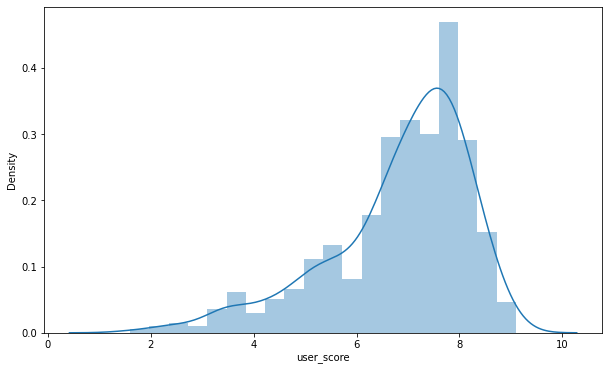

In [114]:
plt.figure(figsize=(10,6))
sns.distplot(action_data)

In [115]:

st_interval_sport=st.t.interval(0.95, len(sport_data)-1, loc=np.mean(sport_data), scale=st.sem(sport_data))
print('Доверительный 95% интервал для пользовательского рейтинга жанра Sport:',st_interval_sport)

Доверительный 95% интервал для пользовательского рейтинга жанра Sport: (5.210336255032036, 5.701458616762837)


<AxesSubplot:xlabel='user_score', ylabel='Density'>

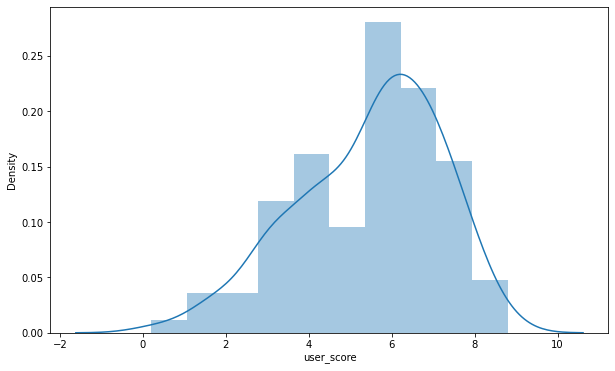

In [116]:
plt.figure(figsize=(10,6))
sns.distplot(sport_data)

In [117]:
alpha=.05  

results = st.ttest_ind(action_data, sport_data, equal_var=True)

print('p-значение', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута - это значит, что средние пользовательские рейтинги не равны

Так как нам не нужны сверх точные значения, то указали уровень статистической значимости 5%. Использовали ttest_ind, т.к. нам необхдимо было проверить гипаотезу равенства средних значений.

Данные свидетельствуют в пользу гипотезы о том, что средние пользовательские рейтинги для жанров Action и Sports все-таки разные. Скорее всего оценки экшнов выше.

**Как сформулировали нулевую и альтернативную гипотезы?**

Для формулирования нулевой гипотезы мы применили функцию ttest_ind. Сравнивая среднее двух совокупностей и формулированияе нулевой гипотезы, мы эти совокупности приравняли, а затем сравнивали со статистический значимостью. Мы сформулировали двустороннюю гипотезу. Значение статистической значимости мы задали 5%. Соответственно для альтернативной гипотезы дело было наоборот. Т.е наши совокупности не равны.

Когда мы сравнивали между собой совокупности, утверждая в гипотезе, что одна совокупность больше или меньше другой, то мы формулировали Одностироннюю гипотезу. Тут сравнивая совокупность со значением среднего мы применяли функцию ttest_1samp. Генеральной гипотезой также было их равенство, а альтернативной гипотезой было утверждение, что одна совокупность больше другой. Сравнение pvalue, которое выдавала функция происходило со статистической значимостью =5%.

## Итоговый вывод

1. Мы изучили выборку данных об видеоиграх, вышедших с 1980 по 2016 годы на различных платформах - консолях и персональных компьютерах. На основе этих данных мы выяснили, какие игры могут хорошо продаваться в 2017 году и составили портреты пользователей разных регионов.
2. К 2016 году PlayStation 4, WiiU, XBox One находятся на подъеме, Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, причем PlayStation Vita на протяжении всей жизни не пользовалась большой популярностью.
3. Среди жанров наиболее продаваемыми являются спортивные игры, шутеры и RPG и платформеры. 
4. Региональные отличия заметны как в выборе пользователями игровых платформ, так и жанров, при этом Северная Америка и Европа более схожи между собой, а Япония заметно отличается. 
5. Так, наиболее популярными платформами в Северной Америке и Европе являются стационарные консоли - XBox 360, XOne, PlayStation 3 и PlayStation 4. В Японии в лидерах мобильная консоль - Nintendo 3DS, а PlayStation3 на втором месте. Среди жанров в Европе и Америке наиболее популярны экшены, спортивные игры и шутеры. В Японии экшены только на втором месте по популярности, лидеры - RPG.
6. Так как рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики), заметнее его влияние в этом регионе и Европе. В Японии популярны игры вовсе без этого рейтинга - судя по всему, это игры, созданные в самой Японии и не получавшие этого рейтинга.
7. Продажи игр сильнее коррелируют с оценкой критиков, чем с оценками пользователей. При этом оценки пользователкй зависят не от платформы, а от жанра.